# TD N° 3 Machine Learning & Text Mining

## Techniques de régression (Régression logistique)

#### Réalisé par BOUCHRA BENGHAZALA - IAGI2

### Importation des libraries

In [79]:
import numpy as np # Chargement de numpy
import matplotlib.pyplot as plt # import de Matplotlib
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Lecture des données

In [80]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Informations à extraire de la description fournie:

`Nom du jeu de données` : Iris plants dataset

`Nombre d'instances` : 150 (50 dans chacune des trois classes)

`Nombre d'attributs` : 4 attributs numériques prédictifs et la classe

`Attributs` :
* Longueur du sépale en cm
* Largeur du sépale en cm
* Longueur du pétale en cm
* Largeur du pétale en cm

`Classe` :
* Iris-Setosa
* Iris-Versicolour
* Iris-Virginica

`Statistiques sommaires` :
Voir le tableau fourni pour les valeurs minimales, maximales, moyennes, écart-types et corrélation de classe pour chaque attribut.

`Valeurs manquantes` : Aucune

`Distribution des classes` : 33,3 % pour chacune des 3 classes

`Fichier` : iris.csv

### <span style="color:blue">1. Type initial du problème</span>

Le type initial du problème pour le jeu de données Iris est la classification.

De plus, le jeu de données Iris est un problème de classification multiclasse car il comporte trois classes différentes : Iris-Setosa, Iris-Versicolour et Iris-Virginica. Chaque échantillon du jeu de données appartient à l'une de ces trois classes. Par conséquent, le but est de prédire à quelle classe appartient chaque échantillon en fonction de ses caractéristiques (longueur et largeur des sépales, longueur et largeur des pétales).

### définir la variable explicative (X)

In [81]:
X= iris.data[:, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

La variable X présente les 2 premières colonnes ('sepal length', 'sepal width')

### Définir la variable dépendante (target variable Y)

In [82]:
y = []

In [83]:
for e in iris.target:
    if e==0: 
        y+=[0]
    else: 
        y+=[1]
y=np.array(y)  
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

iris.target est un tableau (ou vecteur) contenant les étiquettes cibles correspondant à chaque échantillon du jeu de données Iris.

`0` : représente Iris-Setosa

`1` : représente Iris-Versicolour

### <span style="color:blue">2. L’objectif de ces dernières instructions </span>

`Ligne 8` : Sélection des deux premières colonnes de données (longueur du sépale et largeur du sépale) à partir de iris.data. Cela crée une nouvelle variable X qui contient ces deux colonnes de données.

`Ligne 10` : Initialisation d'une liste vide y, qui sera utilisée pour stocker les étiquettes cibles (classes) pour chaque échantillon.

`Lignes 11-13` : Une boucle traverse chaque élément de iris.target. Si la valeur de l'élément est égale à 0, ce qui correspond à la classe Iris-Setosa dans le jeu de données Iris, alors 0 est ajouté à la liste y. Sinon, si la valeur de l'élément est différente de 0 (c'est-à-dire 1 ou 2, correspondant aux classes Iris-Versicolour et Iris-Virginica), alors 1 est ajouté à la liste y.

En résumé, ces instructions préparent les données pour une classification binaire où les échantillons de la classe Iris-Setosa sont étiquetés avec 0, et les échantillons des classes Iris-Versicolour et Iris-Virginica sont étiquetés avec 1. Cela transforme ainsi le problème multiclasse initial en un problème de classification binaire.

### La visualization du graphe (nuage de points)

En Vert les fleurs ayant l'étiquette 0

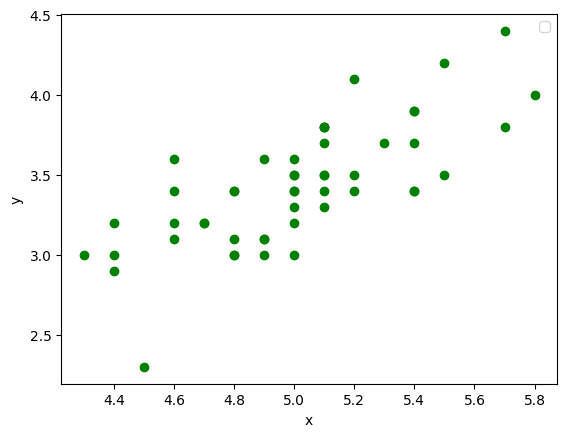

In [84]:
plt.legend(labels = ("classe 0", "classe 1"));
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g') 

En jaune les fleurs ayant l'etiquette 1

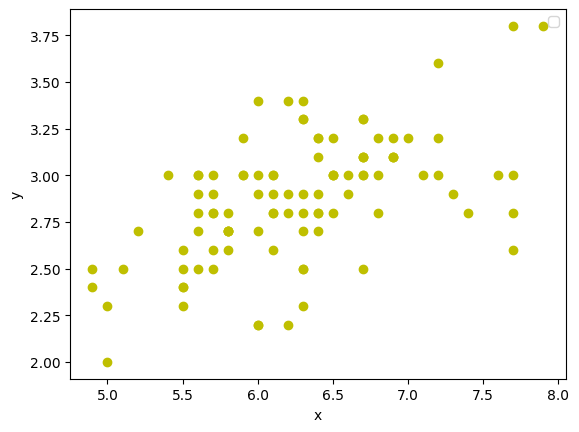

In [85]:
plt.legend(labels = ("classe 0", "classe 1"));
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y') 

### Définition du modèle avec la regression logistique

In [86]:
model = LogisticRegression(C=1e20)#tester avec 0.01
model

LogisticRegression(C=1e+20)

### Séparation des données en données de test et données d'entrainement

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

On a spécifié 20% pour le test et 80% pour l'entrainement du modèle

### <span style="color:blue">3. L’intérêt de la fonction train_test_split </span>

#### L'intérêt principal de train_test_split est de séparer un ensemble de données en deux ensembles distincts : un ensemble d'entraînement et un ensemble de test.

`L'ensemble d'entraînement` est utilisé pour entraîner le modèle d'apprentissage automatique.

`L'ensemble de test` est utilisé pour évaluer les performances du modèle sur des données qu'il n'a pas vues pendant l'entraînement, ce qui permet d'estimer la capacité du modèle à généraliser à de nouvelles données.

#### Paramètres de train_test_split :
`test_size` : C'est le paramètre qui spécifie la proportion des données à inclure dans l'ensemble de test. Dans notre cas, test_size=0.2 signifie que 20 % des données seront utilisées pour former l'ensemble de test, tandis que 80 % seront utilisées pour former l'ensemble d'entraînement.

`random_state` : C'est un paramètre optionnel qui permet de contrôler le mélange aléatoire des données avant de les diviser en ensembles d'entraînement et de test. Si on spécifie une valeur entière pour random_state, la division sera toujours la même chaque fois que nous exécutons le script, ce qui rend les résultats reproductibles. Si on ne spécifie pas de random_state, chaque exécution de la fonction peut produire une division différente des données. Cela est utile pour des raisons de reproductibilité des résultats lors de l'expérimentation avec différents modèles ou paramètres.

### Entrainement du modèle

In [88]:
model.fit(x_train, y_train)

LogisticRegression(C=1e+20)

### Evaluation de la performance du modèle sur les données (x_test/x_train) et leurs étiquettes correspondantes (y_test/y_test)

In [89]:
score1=model.score(x_test, y_test)
score2=model.score(x_train, y_train)
print("score sur test-set ="+str(score1*100)+'%')
print("score sur train-set ="+str(score2*100)+'%')

score sur test-set =100.0%
score sur train-set =100.0%


Un résultat indique que le modèle a une performance parfaite sur les données de test et d'entraînement.
Cela signifie que les prédictions du modèle correspondent exactement aux étiquettes réelles dans les deux cas.

### <span style="color:blue">4. Le score1 et le score2 et la différence entre les deux </span>

Dans le contexte de l'apprentissage automatique supervisé, score1 et score2 correspondent aux performances (scores) du modèle sur les ensembles de test (x_test, y_test) et d'entraînement (x_train, y_train), respectivement. 

`score1` : Il s'agit du score de performance du modèle sur l'ensemble de test (x_test, y_test). Ce score indique à quel point le modèle est performant lorsqu'il est confronté à de nouvelles données qu'il n'a pas vues pendant l'entraînement. En d'autres termes, score1 mesure la capacité du modèle à généraliser à des données inconnues.

`score2` : Il s'agit du score de performance du modèle sur l'ensemble d'entraînement (x_train, y_train). Ce score indique à quel point le modèle est performant lorsqu'il est confronté aux données sur lesquelles il a été entraîné. En d'autres termes, score2 mesure la capacité du modèle à bien s'adapter aux données d'entraînement.

La différence entre les deux scores est importante car elle peut fournir des informations sur la capacité du modèle à généraliser à de nouvelles données. En général, on s'attend à ce que score1 soit légèrement inférieur à score2 car le modèle a été ajusté aux données d'entraînement et peut avoir du mal à généraliser à de nouvelles données. Cependant, si la différence entre score1 et score2 est très importante (par exemple, score2 est considérablement plus élevé que score1), cela peut indiquer un problème de surapprentissage (overfitting) où le modèle s'est trop adapté aux données d'entraînement et ne parvient pas à généraliser correctement. En revanche, si la différence est faible ou nulle, cela peut indiquer que le modèle généralise bien aux données de test, ce qui est un indicateur positif.

Dans notre cas, une valeur de 1 pour les deux scores, à la fois pour l'ensemble de test (score1) et l'ensemble d'entraînement (score2), signifie que le modèle a atteint une performance parfaite sur les deux ensembles de données.

### <span style="color:blue">4. Réexecution de l’expérimentation en variant test_size par 0.3, 0.4 et 0.5 et notons les scores </span>

* pour test_size = 0.3

`score1=` 0.977

`score2=` 1
* pour test_size = 0.4

`score1=` 0.983

`score2=` 1
* pour test_size = 0.5

`score1=` 0.973
 
`score2=` 1

### extraire les coefficients du modèle linéaire (theta0, theta1, theta2)

In [90]:
theta0=model.intercept_;  #l'ordonnée à l'origine de la ligne
theta1=model.coef_[0][0];  #le coefficient de la première variable explicative
theta2=model.coef_[0][1] #le coefficient de la deuxième variable explicative

In [91]:
theta0

array([-179.22811927])

In [92]:
theta1

86.8522077659759

In [93]:
theta2

-94.70217906779156

### Prédiction

In [94]:
Iries_To_Predict = [ [5.5, 2.5], [7, 3], [3,2], [5,3]]
print(model.predict(Iries_To_Predict))

[1 1 0 0]


### Evaluation la performance du modèle avec cross-validation

In [95]:
score=cross_val_score(model,x_train, y_train, cv=5,scoring='accuracy')
print(score)
print(score.mean())

[1.         1.         0.95833333 1.         1.        ]
0.9916666666666668


### <span style="color:blue">6. L'utilisation de la foncion cross_val_score </span>

#### Validation croisée avec cross_val_score

La fonction `cross_val_score` est utilisée pour effectuer une validation croisée du modèle.

- `model`: est le modèle d'apprentissage automatique que nous souhaitons évaluer.
- `x_train`: est le jeu de données d'entraînement, contenant les variables explicatives.
- `y_train`: est le jeu de données d'entraînement, contenant les étiquettes cibles.
- `cv=5`: spécifie que la validation croisée sera effectuée en utilisant une stratégie de validation croisée à 5 plis. Cela signifie que les données d'entraînement seront divisées en 5 ensembles de taille égale, et le modèle sera entraîné et évalué 5 fois, chacune avec un pli différent utilisé comme ensemble de validation et les autres comme ensemble d'entraînement.
- `scoring='accuracy'`: spécifie la métrique utilisée pour évaluer la performance du modèle. Dans ce cas, il s'agit de la précision (accuracy en anglais), qui est le nombre de prédictions correctes divisé par le nombre total de prédictions.

#### Evaluation des résultats de la variable score
`Le premier score` est de 1.0. Cela signifie que le modèle a prédit correctement toutes les étiquettes de l'ensemble de validation lors de la première itération de la validation croisée.

`Le deuxième score` est également de 1.0, indiquant une prédiction correcte de toutes les étiquettes de l'ensemble de validation lors de la deuxième itération.

`Le troisième score` est de 0.95833333, ce qui signifie que le modèle a atteint une précision de 95.83% lors de la troisième itération de la validation croisée.

`Le quatrième score` est de 1.0, indiquant une prédiction correcte de toutes les étiquettes de l'ensemble de validation lors de la quatrième itération.

`Le cinquième score` est également de 1.0, montrant une prédiction correcte de toutes les étiquettes de l'ensemble de validation lors de la cinquième itération.

`La moyenne de ces scores` peut être calculée pour obtenir une estimation de la précision moyenne du modèle sur les données d'entraînement. Dans ce cas, la moyenne de ces scores serait de 0.99166667, ce qui est une mesure de la précision moyenne du modèle sur les données d'entraînement.

#### Changement du paramètre cv et examinant les résultats

* Pour cv= 3

`score`: [0.95  0.975 1.   ]

`score_mean`: 0.975

* Pour cv= 6

`score`: [1.   1.   0.95   1.   1.   1.  ]

`score_mean`: 0.9916666666666667

* Pour cv= 7

`score`: [0.94444444    1.  0.94117647   1.  1.    1.    1. ]

`score_mean`: 0.9836601307189543

On remarque que la meilleure performance est celle de cv=5 avec une précision moyenne de 0.99166667

Cela met en évidence une des propriétés de la validation croisée : un nombre de plis plus élevé ne garantit pas nécessairement de meilleurs résultats. Dans certains cas, un nombre de plis plus bas peut donner une estimation plus fiable de la performance du modèle.

Il est important de noter que le choix du nombre de plis (cv) dépend souvent de la taille de l'ensemble de données et de la stabilité des résultats. Dans votre cas, il semble que c5=6 donne une estimation légèrement meilleure de la performance du modèle par rapport à c6 et cv=7=7. Cependant, cela peut varier en fonction de la nature spécifique de votre ensemble de données et du modèle que vous utilisez.

### Définition de la fonction de regression logistique

In [96]:
def fct_reg_logistic(x1,x2):
    z=(theta0)+theta1*x1+(theta2*x2)
    return(z)

### Test de la fonction

In [97]:
print([fct_reg_logistic(e[0],e[1]) for e in Iries_To_Predict]) 

[array([61.70357577]), array([144.63079789]), array([-108.07585411]), array([-29.07361765])]
